<img src='sample_images/TCG_color_logo.png' height=300 />

# Machine Learning Training Images Repository (1.0.0)
## Misael M. Morales and Michael J. Pyrcz, The University of Texas at Austin
### Zenodo. https://doi.org/10.5281/zenodo.7702128
***

In [1]:
from utils import *

In [2]:
# Load .out files from subdirectory (mydir) and save as .npy, .csv, and .mat
mydir = 'Fluvsim/Channel/NTG_0.2'
n_files = len(os.listdir(mydir))
print('Current directory: {} | Total Files: {}'.format(mydir, n_files))

count = 0
for file in os.listdir(mydir):
    count += 1
    if file.endswith('.out'):

        f = open(os.path.join(mydir, file))
        basename = os.path.splitext(file)[0]
        df = pd.read_csv(f, header=None, skiprows=3)

        facies = np.reshape(np.flip(np.reshape(np.array(df), [128,256,256]).T), (-1,1))
        df_facies = pd.DataFrame(facies, columns=['Facies'])
        mdic_facies = {"Label":basename, "Facies":np.flip(np.array(df))}

        np.save(os.path.join(mydir,basename+'.npy'), facies)
        df_facies.to_csv(os.path.join(mydir,basename+'.csv'), index=False)
        savemat(os.path.join(mydir,basename+'.mat'), mdic_facies)

    print('{},'.format(count), end=' ', flush=True)
print('... Done!')

Current directory: Fluvsim/Channel/NTG_0.2 | Total Files: 98
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, ... Done!


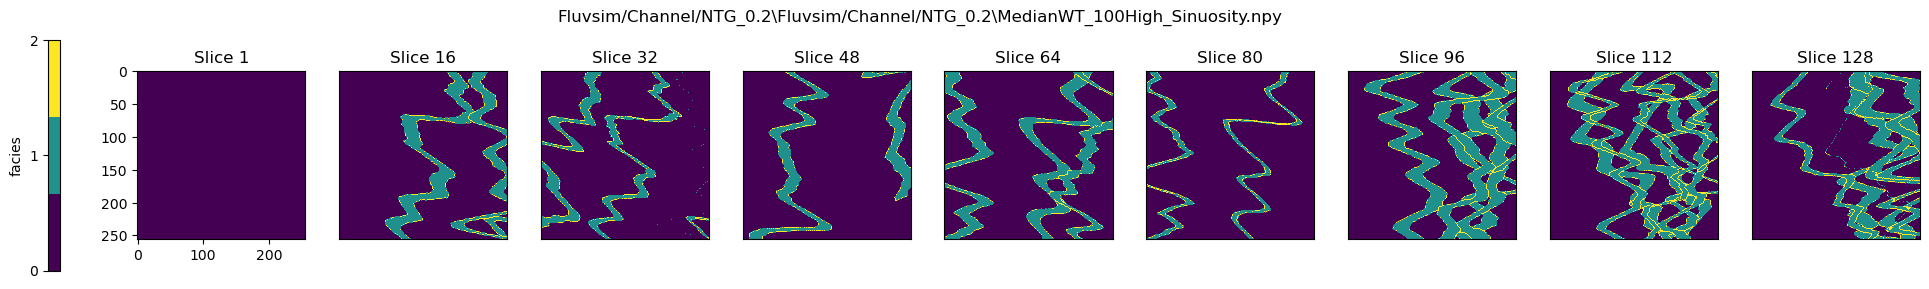

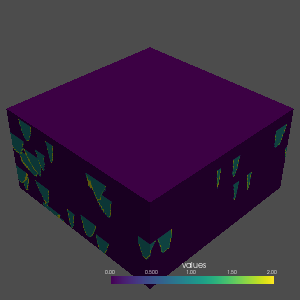

In [3]:
# Define the directory and file to import
mydir = 'Fluvsim/Channel/NTG_0.2'
file = os.path.join(mydir, os.listdir(mydir)[2])
basename = os.path.splitext(file)[0]

facies = np.load(file).reshape(256,256,128)

# 2D slices
slices = [1, 16, 32, 48, 64, 80, 96, 112, 128]
fig, axs = plt.subplots(1, len(slices), figsize=(25,3), facecolor='white')
fig.suptitle(os.path.join(mydir,file))
cmap = plt.get_cmap('viridis', np.max(facies)+1)
for i in range(len(slices)):
    im = axs[i].imshow(facies[:,:,slices[i]-1], cmap=cmap)
    axs[i].set(title='Slice {}'.format(slices[i]))
for k in range(1,len(slices)):
    axs[k].set(xticks=[], yticks=[])
cb = fig.colorbar(im, ax=axs, pad=0.04, fraction=0.04, location='left', ticks=np.unique(facies), label='facies')
plt.show()
fig.savefig(basename+'_slices'+'.png')

# 3D volume
p = pv.Plotter()
p.add_mesh(np.flip(facies))
p.show(window_size=(300,300), jupyter_backend='static', screenshot=basename+'_volume'+'.png')

# END